In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from IPython.display import Image
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

C:\Users\hanya\.conda\envs\new\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df= pd.read_csv('Dataset.csv', na_values=[' ?' ])

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      21517 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   position        21513 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22383 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [4]:
df.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['age', 'work-class', 'work-fnl', 'education', 'education-num',
       'marital-status', 'position', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [6]:
df.shape

(22792, 15)

In [7]:
df.isna().any()

age               False
work-class         True
work-fnl          False
education         False
education-num     False
marital-status    False
position           True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [8]:
df.describe()

,age,work-fnl,education-num,capital-gain,capital-loss,hours-per-week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.593542,1.896337e+05,10.084065,1061.232757,86.730037,40.409705
std,13.657228,1.049660e+05,2.556860,7342.691929,400.970842,12.283072
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.183760e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783840e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.367890e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum()

age                  0
work-class        1275
work-fnl             0
education            0
education-num        0
marital-status       0
position          1279
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     409
salary               0
dtype: int64

In [10]:
df.duplicated().sum()

15

In [11]:
df.drop_duplicates()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,55,Federal-gov,31965,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
22788,21,Private,143604,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,29,NaN,<=50K
22789,35,Private,174308,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
22790,31,Self-emp-not-inc,162551,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,50,NaN,<=50K


<AxesSubplot:xlabel='position'>

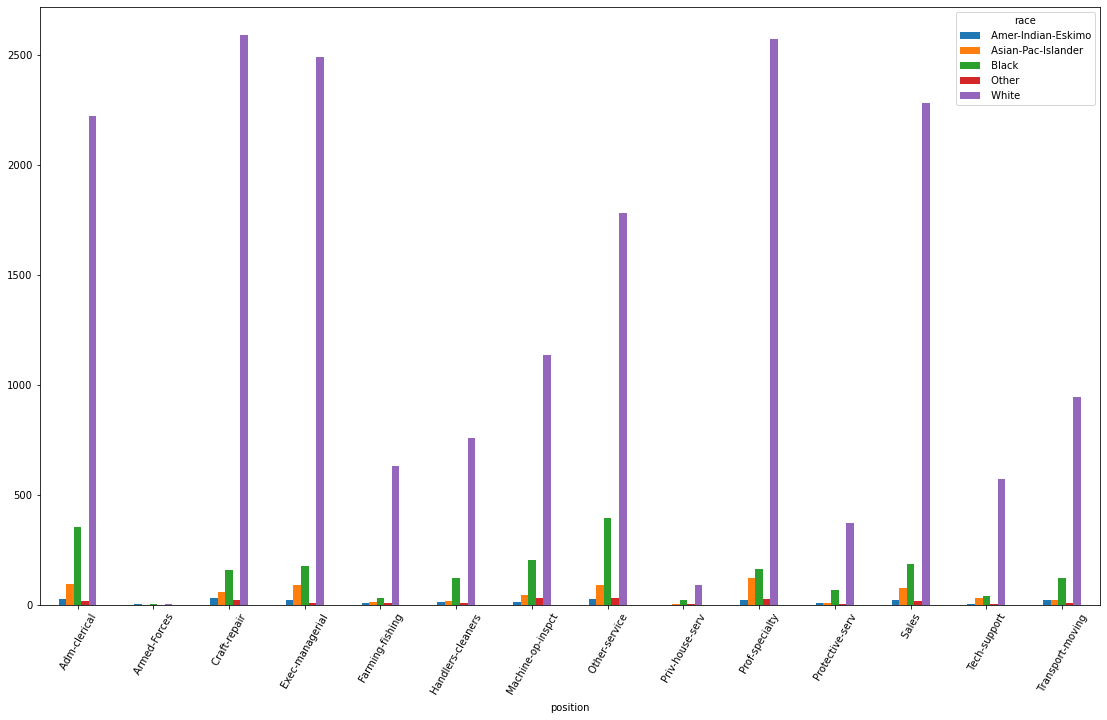

In [12]:
CrosstabResult=pd.crosstab(index=df['position'],columns=df['race'])
CrosstabResult.plot.bar(figsize=(19,11), rot=60)

<AxesSubplot:xlabel='race'>

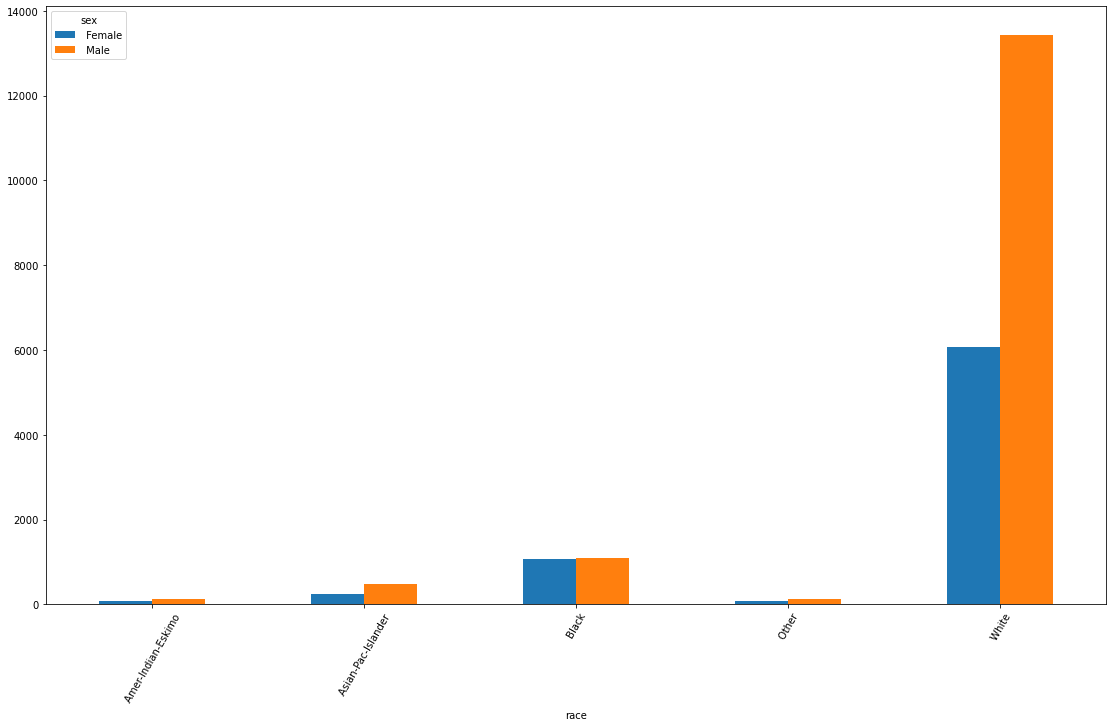

In [13]:
CrosstabResult=pd.crosstab(index=df['race'],columns=df['sex'])
CrosstabResult.plot.bar(figsize=(19,11), rot=60)

<AxesSubplot:xlabel='position'>

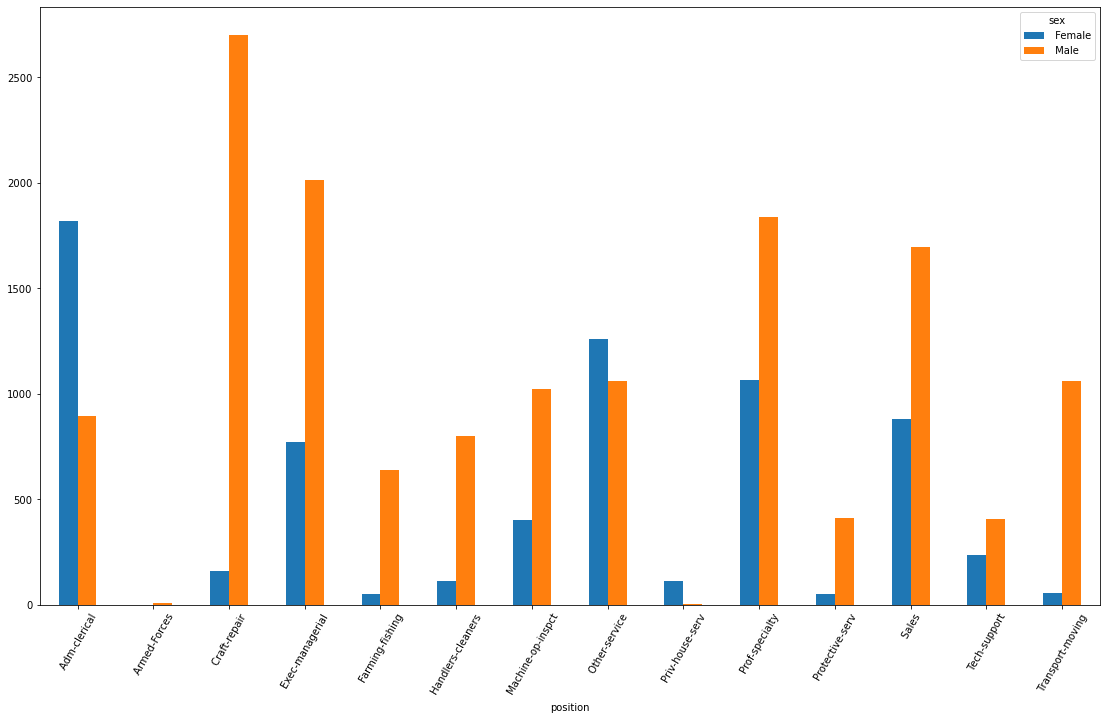

In [14]:
CrosstabResult=pd.crosstab(index=df['position'],columns=df['sex'])
CrosstabResult.plot.bar(figsize=(19,11), rot=60)

In [15]:
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['salary']=encoder.fit_transform(df['salary'])

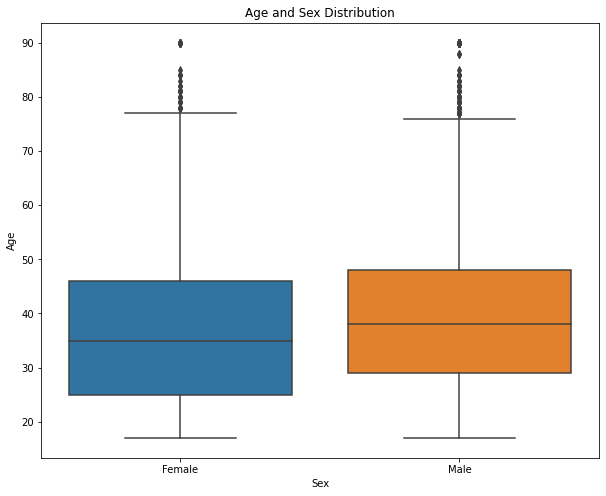

In [201]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
df.sort_values(by=["age"], inplace = True)
df['age_band'] = df['age'].apply(age_band)
fig,ax=plt.subplots(1)
sns.boxplot(data=df,x='sex',y='age', orient='v')
plt.title("Age and Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.xticks([0,1],["Female","Male"])
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

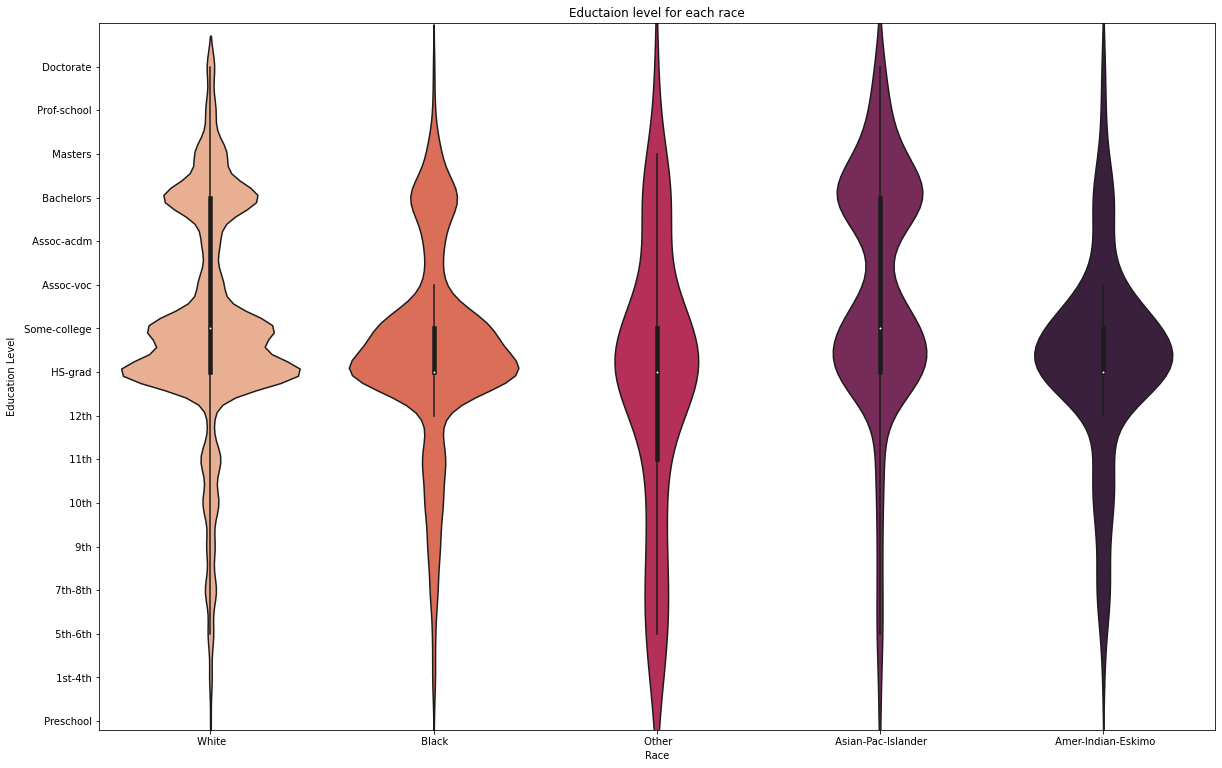

In [202]:
df.sort_values(by=["education-num"], inplace = True)
fig,ax=plt.subplots(1)
sns.violinplot(data=df,x='race',y='education-num', palette="rocket_r",alpha=0.7, orient='v')
plt.title("Eductaion level for each race")
plt.yticks([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],[' Preschool',
       ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
       ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
       ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school',
       ' Doctorate'])
ax.set_ylim([0.8, 17])
plt.ylabel("Education Level")
plt.xlabel("Race")
fig = plt.gcf()
fig.set_size_inches(20, 13)
plt.show()

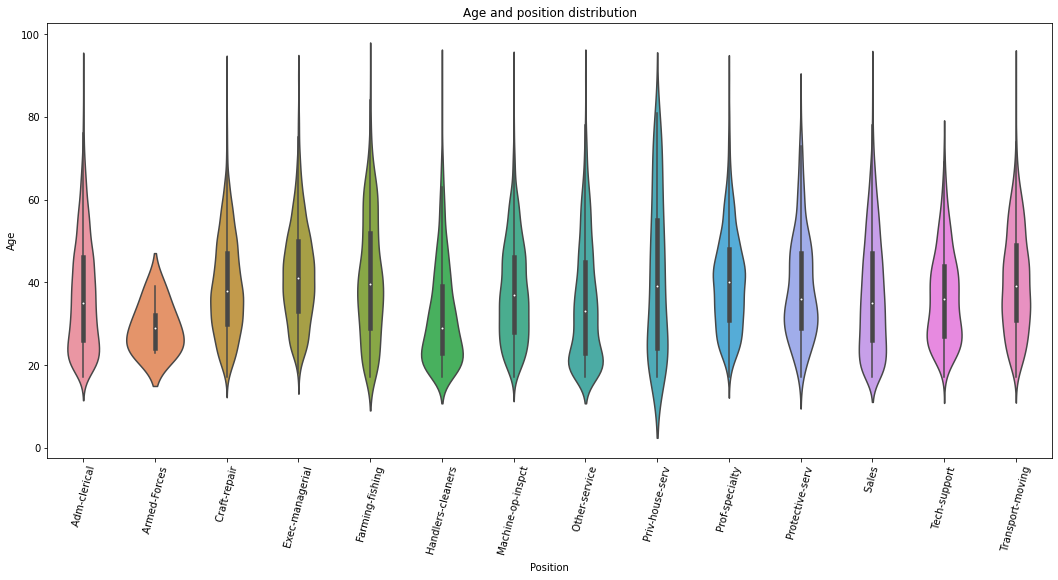

In [203]:
df.sort_values(by=["position"], inplace = True)
fig,ax=plt.subplots(1)
sns.violinplot(data=df,x='position',y='age')
plt.title("Age and position distribution")
plt.xlabel("Position")
plt.ylabel("Age")
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

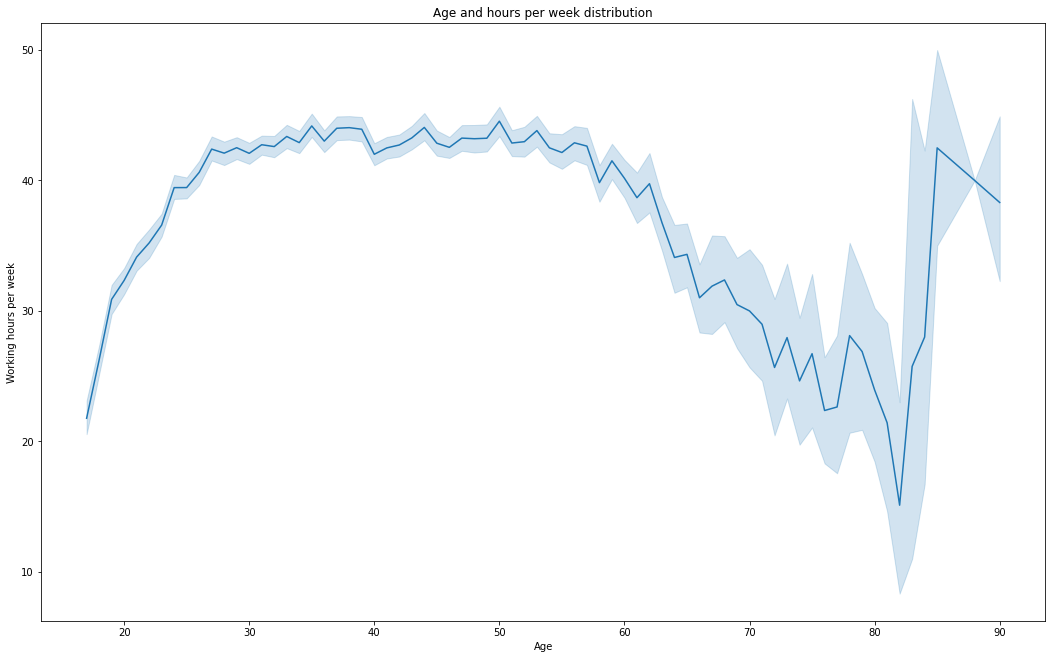

In [204]:
fig,ax=plt.subplots(1)
sns.lineplot(data=df,x='age',y='hours-per-week')
plt.title("Age and hours per week distribution")
plt.xlabel("Age")
plt.ylabel("Working hours per week")
fig = plt.gcf()
fig.set_size_inches(18, 11)
plt.show()

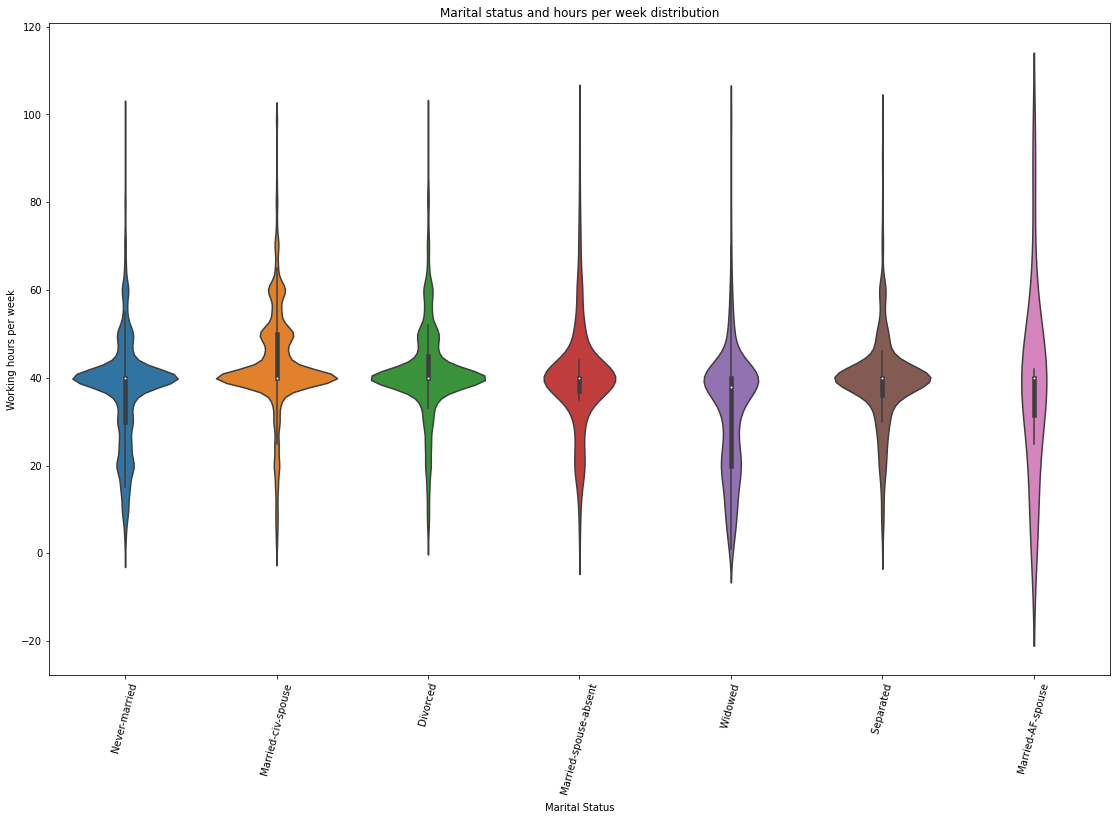

In [205]:
fig,ax=plt.subplots(1)
sns.violinplot(data=df,x='marital-status',y='hours-per-week')
plt.title("Marital status and hours per week distribution")
plt.xlabel("Marital Status")
plt.ylabel("Working hours per week")
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(19, 12)
plt.show()

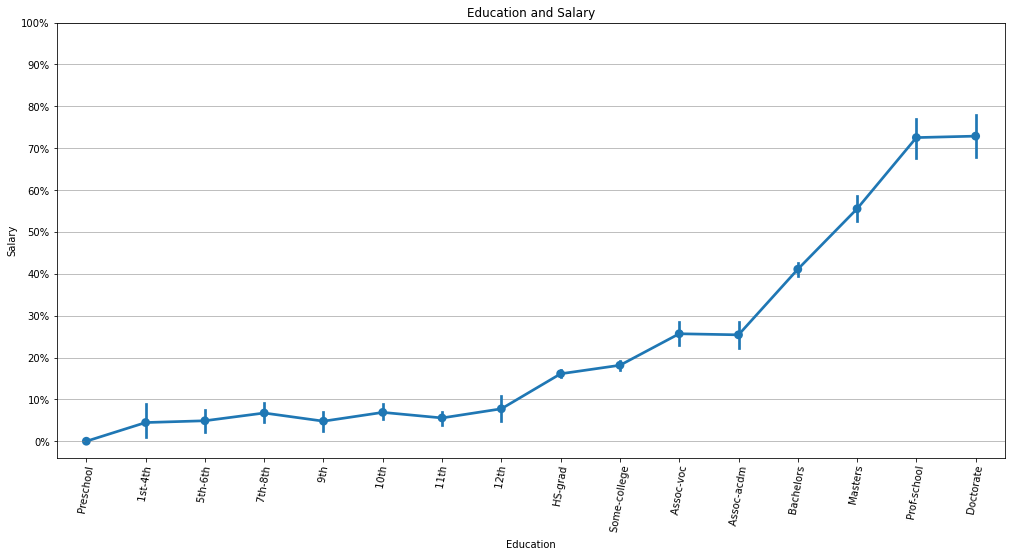

In [207]:
df.sort_values(by=["education-num"], inplace = True)
fig,ax=plt.subplots(1)
sns.pointplot(data=df,x='education',y='salary')
plt.title("Education and Salary")
plt.xlabel("Education")
plt.ylabel("Salary")
plt.yticks([0,0.1,0.20,0.30,0.4,0.50,0.60,0.70,0.80,0.90,1],['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.xticks(rotation=80)
plt.grid(color = 'grey', axis = 'y', linewidth = 0.5)
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()

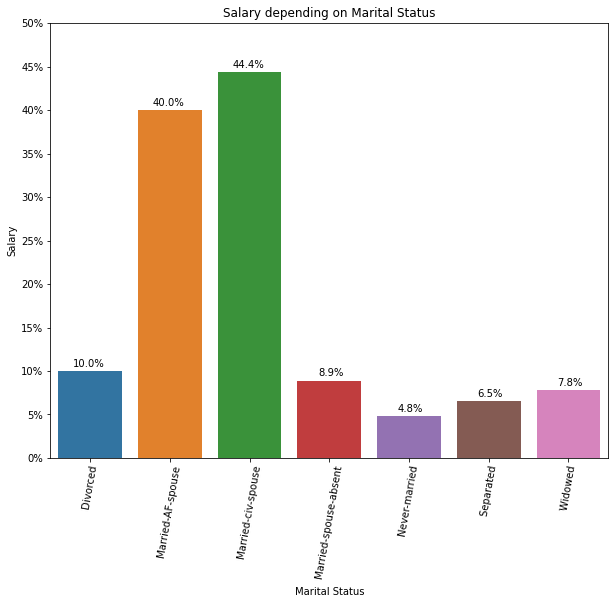

In [212]:
df.sort_values(by=["marital-status"], inplace = True)
df['marital-status']=encoder.fit_transform(df['marital-status'])
fig,ax=plt.subplots(1)
maritalStatus = np.unique(np.array(df['marital-status'])).astype(int)
MsS = df[['marital-status', 'salary']].groupby('marital-status')['salary'].value_counts().sort_index().unstack().fillna(0)
MsS['Salary Percentage'] = round(MsS[1] / (MsS[0] + MsS[1]) * 100, 1)
MsS['marital-status'] = maritalStatus
sns.barplot(data=MsS,x='marital-status',y='Salary Percentage')
plt.title("Salary depending on Marital Status")
plt.xticks([0,1,2,3,4,5,6],[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], rotation=80)
for i in MsS['Salary Percentage'].index:    
    ax.annotate(f"{MsS['Salary Percentage'][i]:.1f}%", 
                   xy=(i+0.18, MsS['Salary Percentage'][i]+1.4),
                   va = 'top', ha='right',fontweight='light', 
                   color='black')

plt.yticks([0,5,10,15,20,25,30,35,40,45,50],["0%","5%","10%","15%","20%","25%","30%","35%","40%","45%","50%"])
plt.xlabel("Marital Status")
plt.ylabel("Salary")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

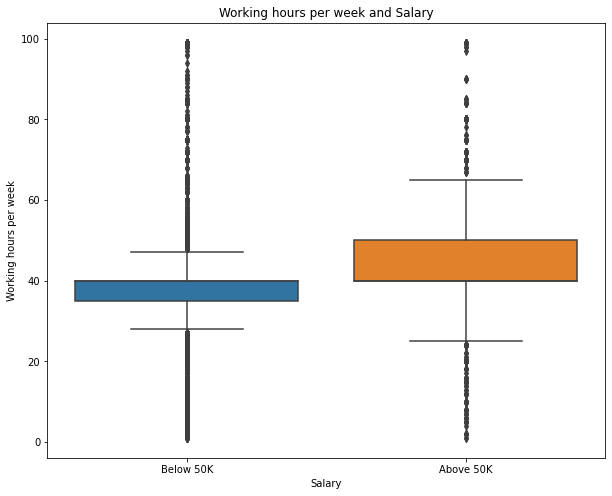

In [213]:
fig,ax=plt.subplots(1)
sns.boxplot(data=df,x='salary',y='hours-per-week', orient='v')
plt.title("Working hours per week and Salary")
plt.xlabel("Salary")
plt.ylabel("Working hours per week")
plt.xticks([0,1],["Below 50K","Above 50K"])
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

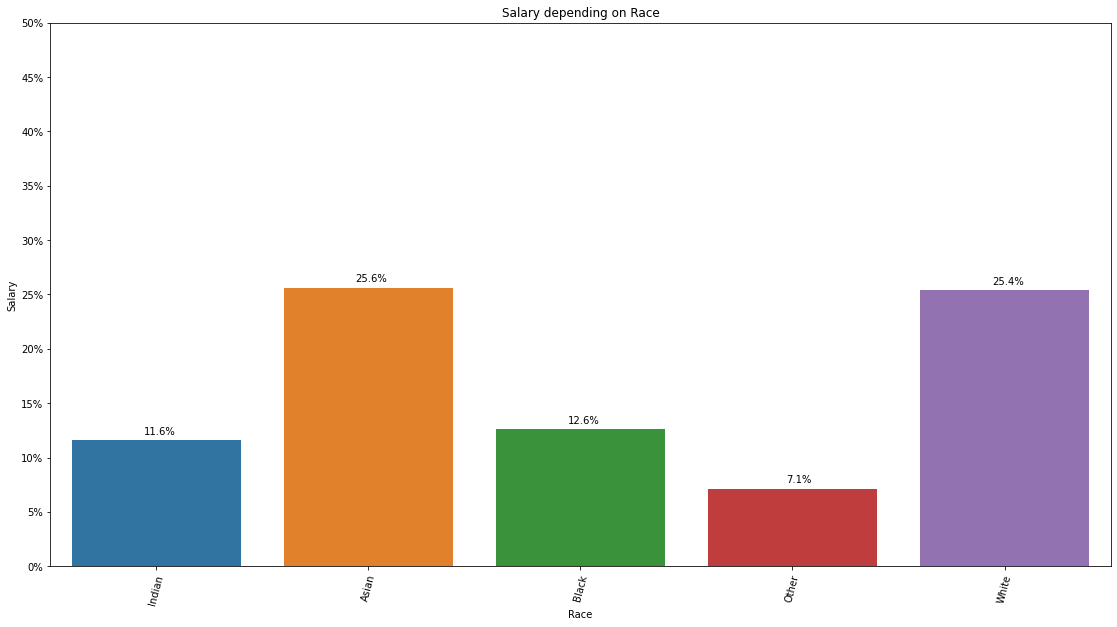

In [225]:
df.sort_values(by=["race"], inplace = True)
df['race']=encoder.fit_transform(df['race'])
df['race'].unique()
fig,ax=plt.subplots(1)
RACE = np.unique(np.array(df['race'])).astype(int)
RS = df[['race', 'salary']].groupby('race')['salary'].value_counts().sort_index().unstack().fillna(0)
RS['Salary Percentage'] = round(RS[1] / (RS[0] + RS[1]) * 100, 1)
RS['Race'] = RACE
sns.barplot(data=RS,x='Race',y='Salary Percentage')
plt.title("Salary depending on Race")

for i in RS['Salary Percentage'].index:    
    ax.annotate(f"{RS['Salary Percentage'][i]:.1f}%", 
                   xy=(i+0.09, RS['Salary Percentage'][i]+1.3),
                   va = 'top', ha='right',fontweight='light', 
                   color='black')
plt.xticks([0, 1, 2, 3, 4],['Indian', 'Asian', 'Black', 'Other',
       'White'], rotation=75)
plt.yticks([0,5,10,15,20,25,30,35,40,45,50],["0%","5%","10%","15%","20%","25%","30%","35%","40%","45%","50%"])
plt.xlabel("Race")
plt.ylabel("Salary")
fig = plt.gcf()
fig.set_size_inches(19,10)
plt.show()

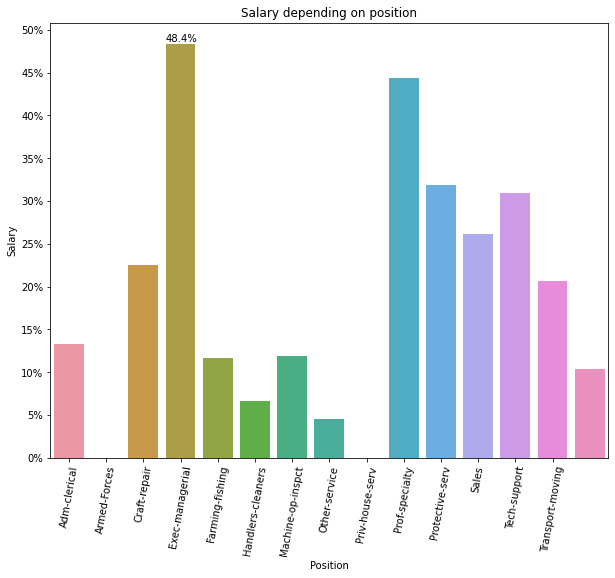

In [231]:
fig,ax=plt.subplots(1)
df['position']=encoder.fit_transform(df['position'])
position = np.unique(np.array(df['position'])).astype(int)
PS = df[['position', 'salary']].groupby('position')['salary'].value_counts().sort_index().unstack().fillna(0)
PS['Salary Percentage'] = round(PS[1] / (PS[0] + PS[1]) * 100, 1)
PS['Position'] = position
sns.barplot(data=PS,x='Position',y='Salary Percentage')
plt.title("Salary depending on position")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial',
                                              'Farming-fishing','Handlers-cleaners','Machine-op-inspct','Other-service',
                                              'Priv-house-serv','Prof-specialty','Protective-serv','Sales','Tech-support',
                                              'Transport-moving'], rotation=80)
ax.annotate(f"{PS['Salary Percentage'][3]:.1f}%", 
                   xy=(3.45, PS['Salary Percentage'][3]+1.2),
                   va = 'top', ha='right',fontweight='light', 
                   color='black')

plt.yticks([0,5,10,15,20,25,30,35,40,45,50],["0%","5%","10%","15%","20%","25%","30%","35%","40%","45%","50%"])
plt.xlabel("Position")
plt.ylabel("Salary")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

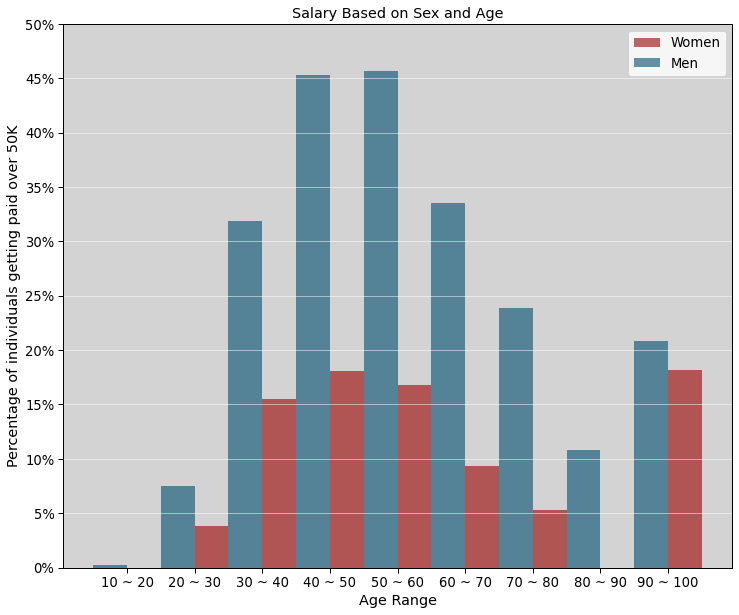

In [234]:
t = np.unique(np.array(df['age_band']))
x = np.arange(len(t))
#Calculating the Salary for males
mendf = df.copy()
mendf.drop(mendf[mendf['sex'] == 0].index, inplace = True)
mdf = mendf[['age_band', 'salary']].groupby('age_band')['salary'].value_counts().sort_index().unstack().fillna(0)
mdf['Salary'] = round(mdf[1] / (mdf[0] + mdf[1]) * 100, 1)
#Calculating the Salary for females
womendf = df.copy()
womendf.drop(womendf[womendf['sex'] == 1].index, inplace = True)
wdf = womendf[['age_band', 'salary']].groupby('age_band')['salary'].value_counts().sort_index().unstack().fillna(0)
wdf['Salary'] = round(wdf[1] / (wdf[0] + wdf[1]) * 100, 1)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plt.bar(x+0.25, wdf["Salary"], 0.5, label='Women', alpha=0.6, color='#990000')
plt.bar(x-0.25, mdf["Salary"], 0.5, label='Men', alpha=0.6, color='#004c70')
plt.xticks(x,t)
sns.set_context("paper", font_scale=1.5)
plt.xlabel("Age Range")
plt.ylabel("Percentage of individuals getting paid over 50K")
plt.title("Salary Based on Sex and Age")
plt.yticks([0,5,10,15,20,25,30,35,40,45,50],["0%","5%","10%","15%","20%","25%","30%","35%","40%","45%","50%"])
ax.set_facecolor('lightgrey')
plt.legend()
plt.grid(color = 'white', axis = 'y', linewidth = 0.5)
plt.show()

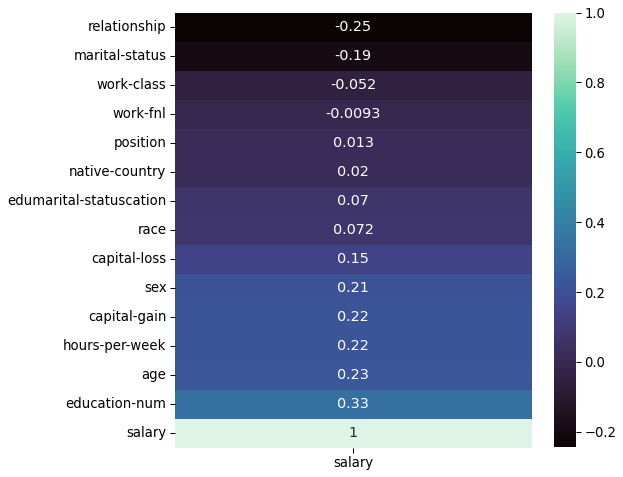

In [235]:
df['work-class']=encoder.fit_transform(df['work-class'])
df['work-fnl']=encoder.fit_transform(df['work-fnl'])
df['edumarital-statuscation']=encoder.fit_transform(df['education'])
df['marital-status']=encoder.fit_transform(df['marital-status'])
df['position']=encoder.fit_transform(df['position'])
df['relationship']=encoder.fit_transform(df['relationship'])
df['race']=encoder.fit_transform(df['race'])
df['native-country']=encoder.fit_transform(df['native-country'])
df['salary']=encoder.fit_transform(df['salary'])
df['sex']=encoder.fit_transform(df['sex'])
corr= df.corr()[['salary']].sort_values(by='salary')
sns.heatmap(corr, cmap="mako", annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [16]:
df.drop(['education','work-class','work-fnl','native-country','position','race'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   education-num   22792 non-null  int64 
 2   marital-status  22792 non-null  object
 3   relationship    22792 non-null  object
 4   sex             22792 non-null  int32 
 5   capital-gain    22792 non-null  int64 
 6   capital-loss    22792 non-null  int64 
 7   hours-per-week  22792 non-null  int64 
 8   salary          22792 non-null  int32 
dtypes: int32(2), int64(5), object(2)
memory usage: 1.4+ MB


In [18]:
df.shape

(22792, 9)

In [19]:
encoder=LabelEncoder()

In [20]:
df = pd.get_dummies(df, columns = ['marital-status','relationship','sex'])
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,...,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_0,sex_1
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13,0,0,13,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,53,7,0,0,40,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [21]:
df['salary'].unique()

array([0, 1])

In [22]:
df['salary']=encoder.fit_transform(df['salary'])

In [23]:
df.isna().sum()

age                                      0
education-num                            0
capital-gain                             0
capital-loss                             0
hours-per-week                           0
salary                                   0
marital-status_ Divorced                 0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
relationship_ Husband                    0
relationship_ Not-in-family              0
relationship_ Other-relative             0
relationship_ Own-child                  0
relationship_ Unmarried                  0
relationship_ Wife                       0
sex_0                                    0
sex_1                                    0
dtype: int64

In [24]:
x=df.columns.values

In [25]:
standard = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(standard) 

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.520548,0.600000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22788,0.054795,0.600000,0.00000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22789,0.246575,0.600000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22790,0.191781,0.466667,0.00000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
for i in range(len(x)):
    df = df.rename({i:x[i]}, axis=1)
df

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,...,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_0,sex_1
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.520548,0.600000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22788,0.054795,0.600000,0.00000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22789,0.246575,0.600000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22790,0.191781,0.466667,0.00000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [28]:
x=df.loc[:, df.columns!='salary']
y= df['salary']

In [29]:
sm = SMOTE()
xs, ys= sm.fit_resample(x, y)

ada = ADASYN(random_state=42)
xs, ys = ada.fit_resample(X, y)

sm = BorderlineSMOTE(random_state=42)
xs, ys= sm.fit_resample(x, y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.2, random_state = 0)  

In [31]:
print(len(y_train==1))
print(len(y_train==0))  

27768
27768


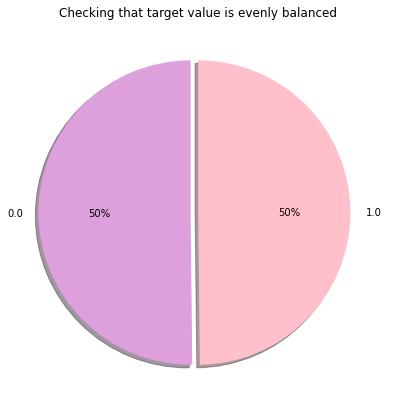

In [62]:
labels =y_train.value_counts(sort = True).index
sizes = y_train.value_counts(sort = True)

colors = ["plum",'pink']
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.0f%%', shadow=True, startangle=90,)

plt.title('Checking that target value is evenly balanced')
plt.show()

In [63]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,...,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [244]:
#Logistic Regression using Default Values
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[2623  800]
 [ 498 3021]]
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80      3423
         1.0       0.79      0.86      0.82      3519

    accuracy                           0.81      6942
   macro avg       0.82      0.81      0.81      6942
weighted avg       0.82      0.81      0.81      6942



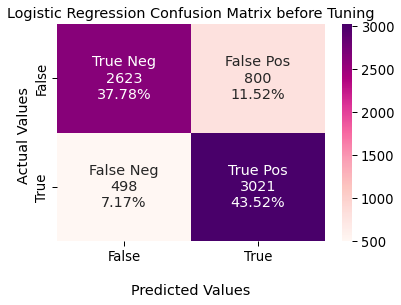

In [245]:
#Confusion Matrix Before Tuning
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='RdPu')
ax.set_title('Logistic Regression Confusion Matrix before Tuning');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

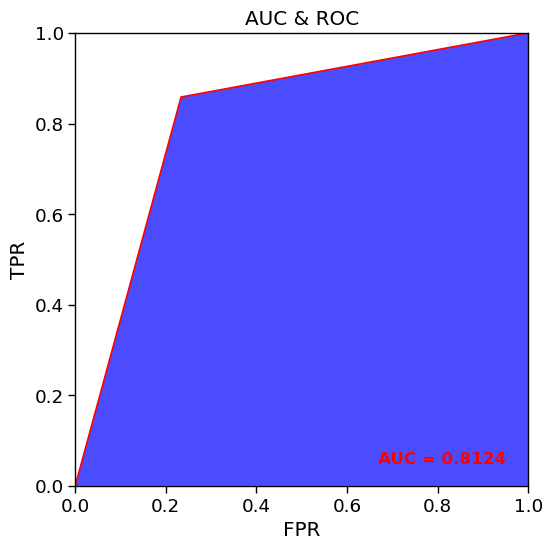

In [246]:
auc = metrics.roc_auc_score(y_test, predicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [247]:
#Logistic Regression
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1,1,10],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter' : [100, 1000]
    }
]

In [248]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 10,scoring='accuracy',verbose=3,refit=True)
best_clf = clf.fit(x_train,y_train)
best_clf.best_estimator_
print("Tuned Hyperparameters :", best_clf.best_params_)
print("Accuracy :",best_clf.best_score_)
model = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear')
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total

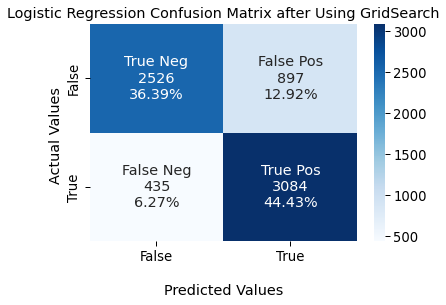

In [250]:
#Confusion Matrix with Grid Search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix after Using GridSearch');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

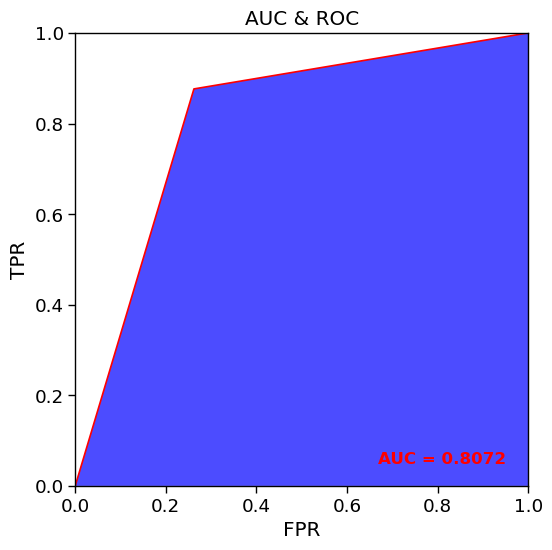

In [251]:
auc = metrics.roc_auc_score(y_test, predicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [252]:
#Random Search with Logistic Regression
from sklearn.model_selection import RandomizedSearchCV
param = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter' : [100, 1000,2500]
    }
]
randomizedsearch = RandomizedSearchCV(logModel,param,cv = 10,scoring='accuracy',verbose=3,refit=True)
best_model_random = randomizedsearch.fit(x_train, y_train)
print(best_model_random.best_estimator_)
print("Tuned Hyperparameters :", best_model_random.best_params_)
print("Accuracy :",best_model_random.best_score_)

model = LogisticRegression(C=1.0, max_iter=2500, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=100.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0

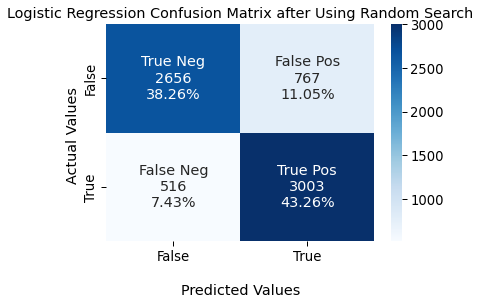

In [253]:
#Confusion Matrix for Random Search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix after Using Random Search');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

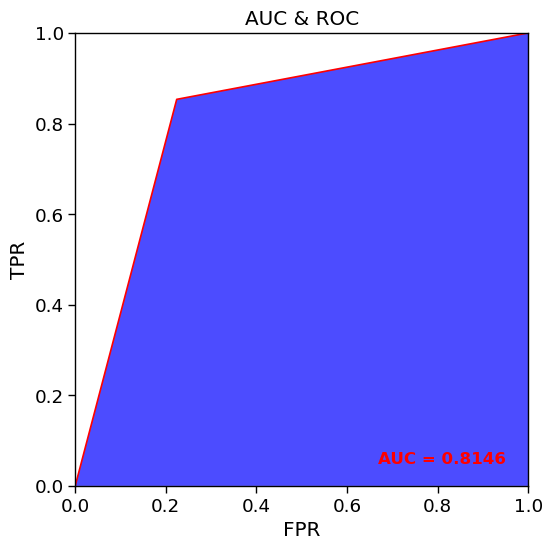

In [254]:
auc = metrics.roc_auc_score(y_test, predicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [255]:
#Linear SVM
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predicted= lin_clf.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[2592  831]
 [ 454 3065]]
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      3423
         1.0       0.79      0.87      0.83      3519

    accuracy                           0.81      6942
   macro avg       0.82      0.81      0.81      6942
weighted avg       0.82      0.81      0.81      6942



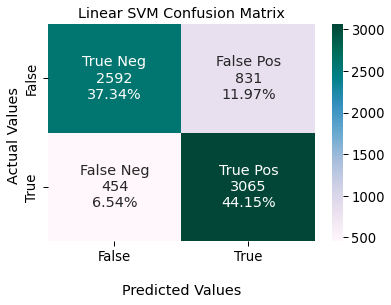

In [256]:
#Confusion Matrix for Linear SVM
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='PuBuGn')
ax.set_title('Linear SVM Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

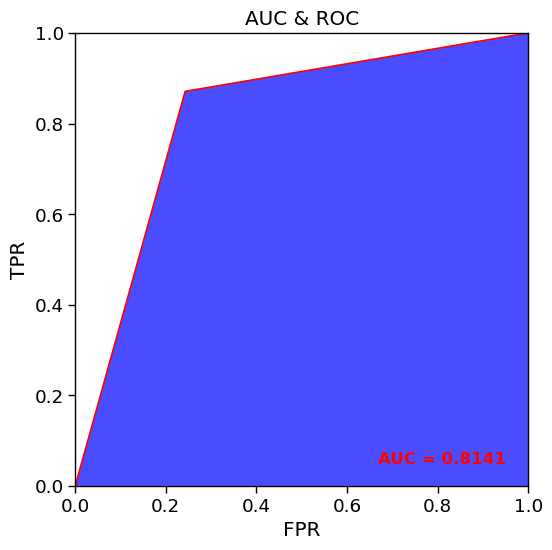

In [257]:
auc = metrics.roc_auc_score(y_test, predicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [259]:
#Using kernel instead of Linear SVM
from sklearn.svm import SVC
svm_clf = SVC(gamma='scale')
svm_clf.fit(x_train[:10000], y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
report = classification_report(y_test, y_pred)
print(report)

[[2376 1047]
 [ 407 3112]]
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.77      3423
         1.0       0.75      0.88      0.81      3519

    accuracy                           0.79      6942
   macro avg       0.80      0.79      0.79      6942
weighted avg       0.80      0.79      0.79      6942



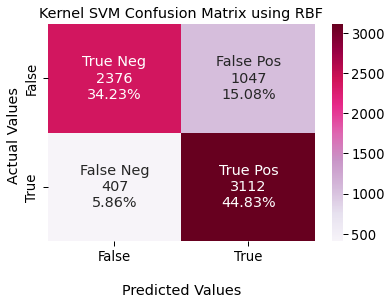

In [260]:
#Confusion Matrix for Kernel SVM (RBF) without Tuning
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='PuRd')
ax.set_title('Kernel SVM Confusion Matrix using RBF');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

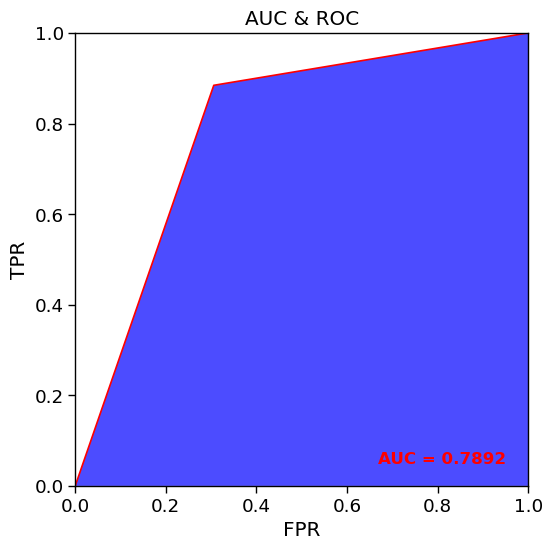

In [261]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [262]:
#Kernel SVM Hypertuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=10)
rnd_search_cv.fit(x_train[:1000], y_train[:1000])
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
print(rnd_search_cv.best_estimator_)
print("Tuned Hyperparameters :", rnd_search_cv.best_params_)
print("Accuracy :",rnd_search_cv.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ....C=8.93153329857951, gamma=0.0015821670408528031; total time=   0.0s
[CV] END ..C=10.372181793372388, gamma=0.0013385844195587498; total time=   0.0s
[CV] END ..C=10.372181793372388, gamma=0.00133

In [263]:
#Kernel SVM Model after Hyperparameter Tuning
svm_model=SVC(C=8.93153329857951,gamma=0.0015821670408528031)
svm_model.fit(x_train, y_train)
predicted = svm_model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[2273 1150]
 [ 517 3002]]
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73      3423
         1.0       0.72      0.85      0.78      3519

    accuracy                           0.76      6942
   macro avg       0.77      0.76      0.76      6942
weighted avg       0.77      0.76      0.76      6942



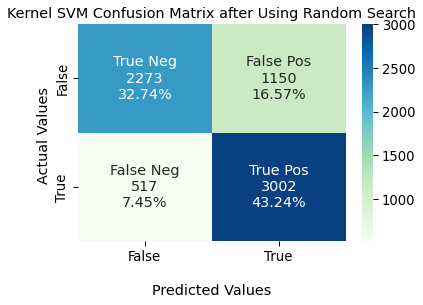

In [264]:
#Confusion Matrix After Random Search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='GnBu')
ax.set_title('Kernel SVM Confusion Matrix after Using Random Search');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

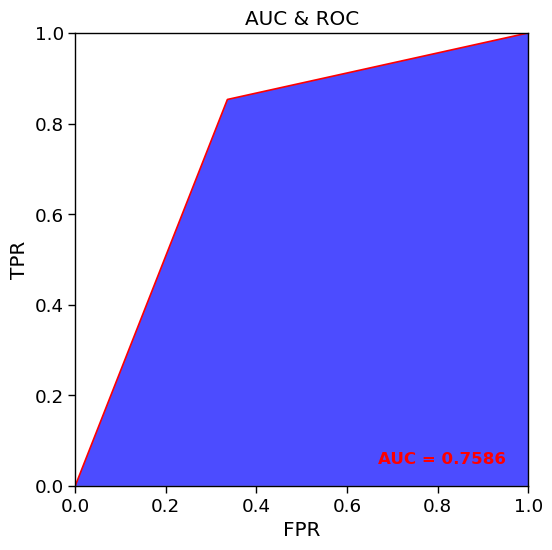

In [265]:
auc = metrics.roc_auc_score(y_test, predicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [266]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8350619418035148, 0.8019302794583694, 0.834485738980121, 0.8170556035724575, 0.831316623451455, 0.8244021895707289, 0.8308844713339095, 0.8308844713339095, 0.8324690290982426, 0.8280034572169404, 0.8316047248631518, 0.829443964275425, 0.827571305099395, 0.827571305099395, 0.8287237107461827, 0.8256986459233651, 0.8274272543935465, 0.8282915586286372, 0.829155862863728, 0.8281475079227888, 0.8281475079227888, 0.8245462402765773, 0.8233938346297897, 0.8233938346297897, 0.8231057332180928]


Text(0, 0.5, 'Testing Accuracy')

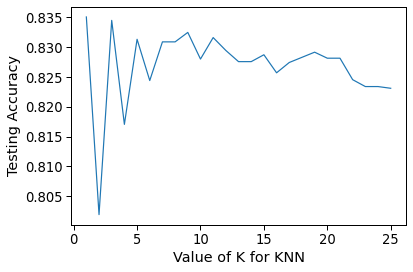

In [267]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [268]:
k_range = list(range(1, 26))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(x_train, y_train)

print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

# highest accuracy but overfits as seen in next plot

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : 83.36%


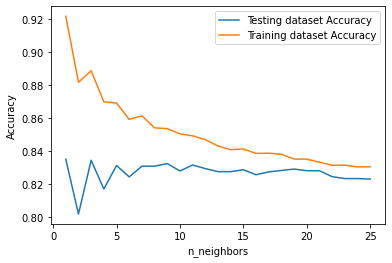

In [81]:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [269]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(round(metrics.accuracy_score(y_test, y_pred),2))

0.83


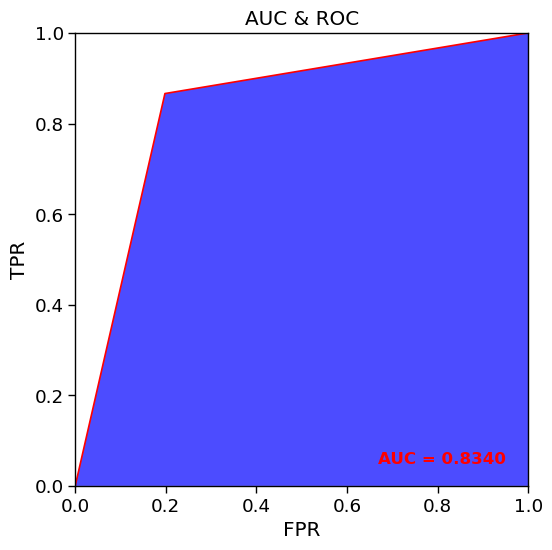

In [270]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [279]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
y_pred_naive = nb_model.predict(x_test)

In [280]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74      3423
         1.0       0.73      0.89      0.80      3519

    accuracy                           0.77      6942
   macro avg       0.79      0.77      0.77      6942
weighted avg       0.79      0.77      0.77      6942



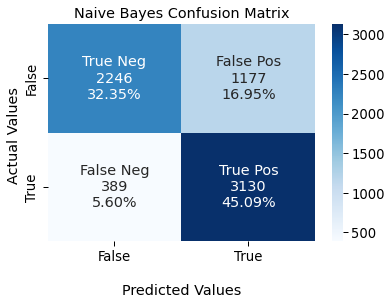

In [281]:
cf_matrix_naive = confusion_matrix(y_test, y_pred_naive)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix_naive.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix_naive.flatten()/np.sum(cf_matrix_naive)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_naive, annot=labels, fmt='', cmap='Blues')
ax.set_title('Naive Bayes Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


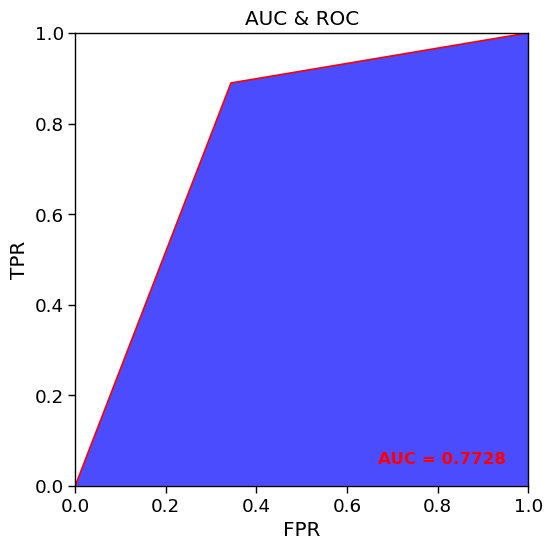

In [282]:
auc = metrics.roc_auc_score(y_test, y_pred_naive)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_naive)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [283]:
clf2=GaussianNB()
accuracies5 = cross_val_score(clf2, x_train, y_train, cv = 10)
print(accuracies5)
res_naive_k=accuracies5.max()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_naive_k))

[0.79006122 0.7814188  0.7839395  0.77565718 0.76557436 0.77421678
 0.76917537 0.76989557 0.77089337 0.77917867]
K-Fold Validation Mean Accuracy: 79.01 %


In [284]:
df=DecisionTreeClassifier(criterion='entropy',random_state=42)
df.fit(x_train,y_train)
y_pred_dt=df.predict(x_test)

In [285]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      3423
         1.0       0.85      0.86      0.86      3519

    accuracy                           0.85      6942
   macro avg       0.85      0.85      0.85      6942
weighted avg       0.85      0.85      0.85      6942



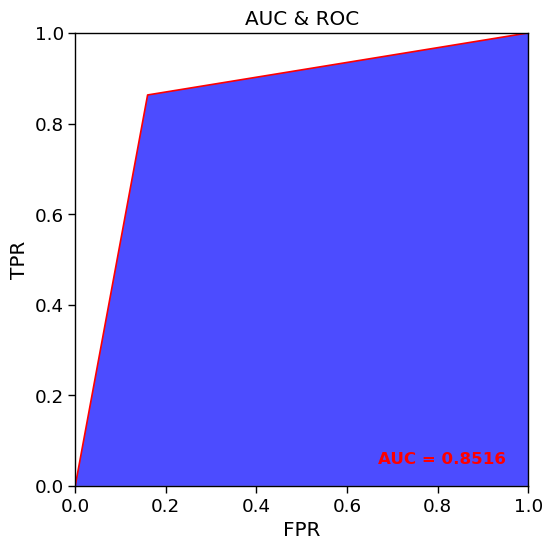

In [286]:
auc = metrics.roc_auc_score(y_test, y_pred_dt)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_dt)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [287]:
clf1=DecisionTreeClassifier()
accuracies4 = cross_val_score(clf1, x_train, y_train, cv = 10)
print(accuracies4)
res_dt_k=accuracies4.mean()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_dt_k))

[0.84515664 0.84263594 0.84911775 0.85091826 0.84551674 0.83579402
 0.85343896 0.84227584 0.84329971 0.84149856]
K-Fold Validation Mean Accuracy: 84.50 %


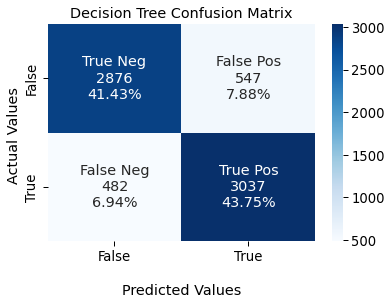

In [288]:
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [289]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
             'criterion' : ('gini', 'entropy', 'log_loss'),
             'max_depth' : (3, 5, 7, 9, 10, 15, 20, None),
             'max_features' : ('sqrt', 'log2', None)
        }
    }
}


scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train )
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

dfRandomizedSearch = round(pd.DataFrame(scores,columns=['model','best_score','best_params']),2)
dfRandomizedSearch



,model,best_score,best_params
0,decision_tree,0.84,"{'max_features': None, 'max_depth': 10, 'crite..."


In [290]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
             'criterion' : ('gini', 'entropy', 'log_loss'),
             'max_depth' : (3, 5, 7, 9, 10, 15, 20, 25, None),
             'max_features' : ('sqrt', 'log2', None)
        }
    }
}


scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train )
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

dfGridSearch = round(pd.DataFrame(scores,columns=['model','best_score','best_params']),2)
dfGridSearch



,model,best_score,best_params
0,decision_tree,0.85,"{'criterion': 'entropy', 'max_depth': 20, 'max..."


In [291]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 170, 200]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}


Text(0, 0.5, 'Testing Accuracy')

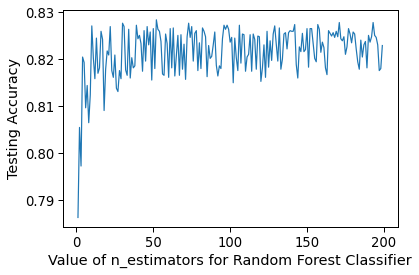

In [292]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k, max_depth=7)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [302]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=200,
                                 max_depth=20,
                                 random_state=1,
                                 n_jobs=2)

forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
print('Accuracy: %.2f' % round(accuracy_score(y_test, y_pred),2))

Accuracy: 0.87


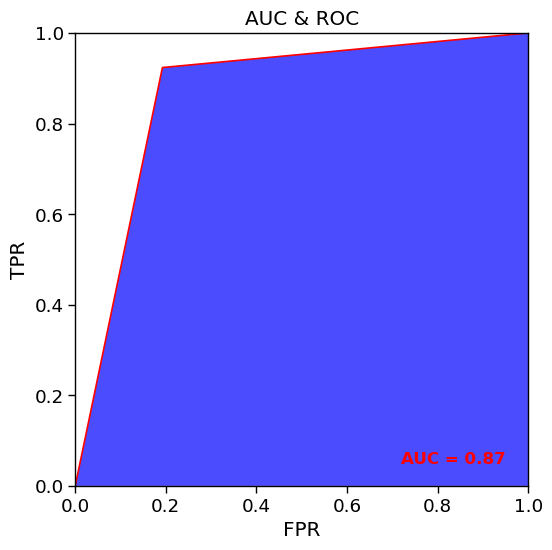

In [304]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
    
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot(range(1,20),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(10, 10)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
res_knn= accuracy_score(y_pred,y_test)
print('Accuracy of KNN = ' + str(res_knn))

acc_knn= accuracy_score(y_test, y_pred)
pre_knn=precision_score(y_test, y_pred)
re_knn=recall_score(y_test, y_pred)
error_knn=(1-accuracy_score(y_test,y_pred))
spec_knn=recall_score(y_test, y_pred, pos_label=0)
print("Accuracy score: ", acc_knn)
print("Precision score: ",pre_knn) 
print("Recall Score: ",re_knn) 
print("Error Rate: ",error_knn)
print('Specificity : ',spec_knn)

In [275]:
abc = AdaBoostClassifier(n_estimators=42,learning_rate=1)

In [276]:
m = abc.fit(x_train, y_train)

In [277]:
out = model.predict(x_test)

In [278]:
print("Accuracy:",round(metrics.accuracy_score(y_test, out),2))

Accuracy: 0.82


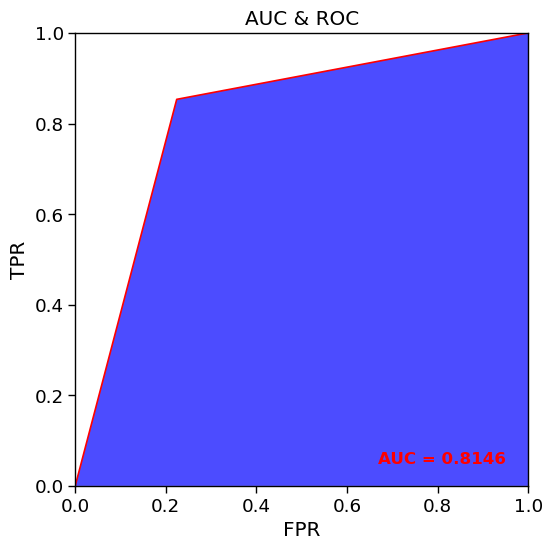

In [305]:
auc = metrics.roc_auc_score(y_test, out)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, out)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [100]:
mod=XGBClassifier()
mod.fit(x_train, y_train)
out1 = mod.predict(x_test)

In [101]:
print("Accuracy:",round(metrics.accuracy_score(y_test, out1),2))

Accuracy: 0.88


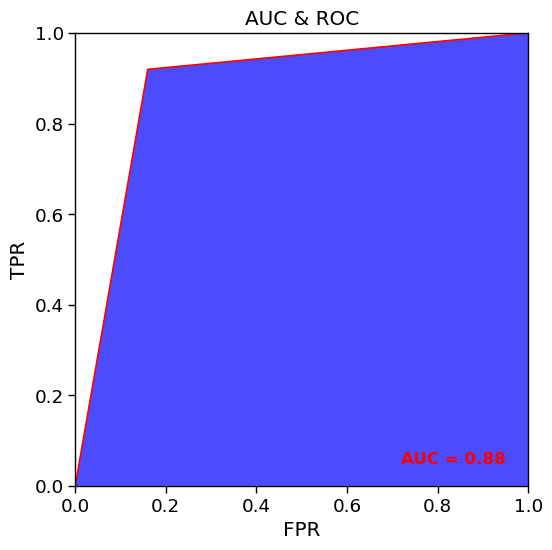

In [307]:
auc = metrics.roc_auc_score(y_test, out1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, out1)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [61]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3053 - accuracy: 0.8559 - val_loss: 0.4454 - val_accuracy: 0.8369
Epoch 2/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3042 - accuracy: 0.8575 - val_loss: 0.4172 - val_accuracy: 0.8413
Epoch 3/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3067 - accuracy: 0.8566 - val_loss: 0.4072 - val_accuracy: 0.8343
Epoch 4/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3019 - accuracy: 0.8594 - val_loss: 0.4396 - val_accuracy: 0.8391
Epoch 5/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3029 - accuracy: 0.8567 - val_loss: 0.4346 - val_accuracy: 0.8401
Epoch 6/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3018 - accuracy: 0.8581 - val_loss: 0.4204 - val_accuracy: 0.8394
Epoch 7/200
868/868 [==============================] - 1s 1ms/step - loss: 0.3055 - accuracy: 0.8567 - val_loss: 0.4226 - val_accuracy: 0.8341